In [1]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
czas = []

In [2]:
# ZMIENIC GESTOSC BO MAMY ILOSC PUNKTOW X ILOSC KLAS. STALA ILOSC PUNKTOW !!!

<H1>Przygotowanie zbioru danych: XOR<H1>

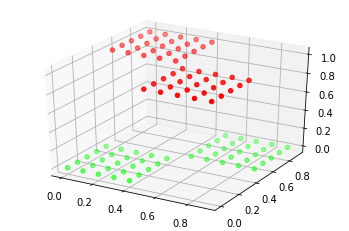

In [3]:
x = np.arange(0, 1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.logical_xor(dataX >= 0.5, dataY >= 0.5) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

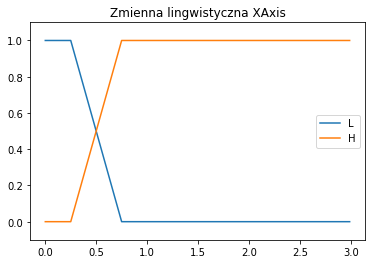

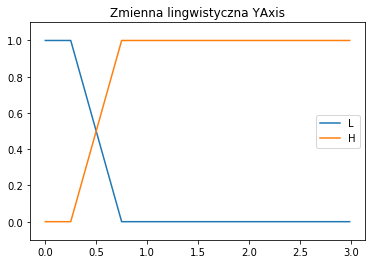

In [4]:
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

#mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()
plt.show()

<H1>Inicjalizacja systemu ANFIS</H1>

Parametry początkowe:
Przesłanki:  [[0.5, 0.5], [0.5, 0.5]] 
Konkluzje:  [[0.30519888 0.4592557  0.89601206]
 [0.98843215 0.4324868  0.47258119]
 [0.40814302 0.64199242 0.48541919]
 [0.72035963 0.38939937 0.84995605]]


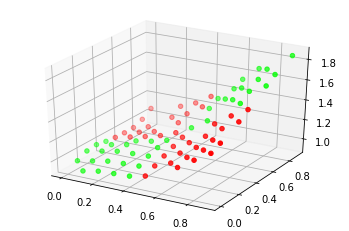

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

<H1>Uczenie systemu ANFIS</H1>

Optymalizacja zakończona!
z blędem:   26.500002722482446
Liczba ew:  30041
Liczba it:  50
TIME elapsed:  5.906121015548706


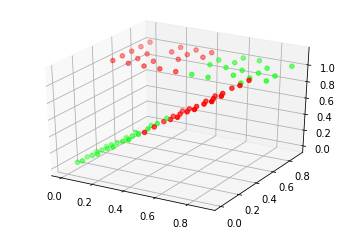

In [6]:
start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

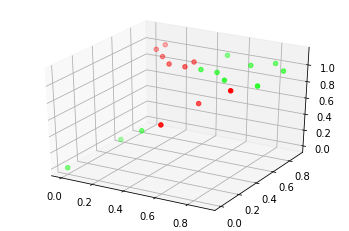

[[3 8]
 [0 9]]


In [7]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

<H1>Sprawdzanie parametrów jakich nauczył się system</H1>

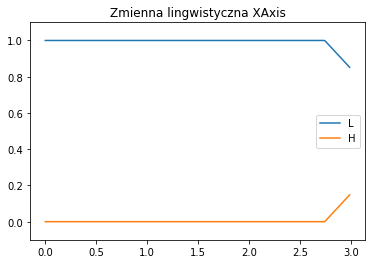

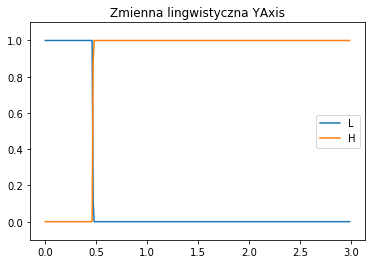

In [8]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [9]:
print("Parametry końcowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

Parametry końcowe:
Przesłanki:  [[3.57282179e+00 1.65577957e+00]
 [4.70581643e-01 1.18255438e-03]] 
Konkluzje:  [[1.24999993e+00 2.05561331e-13 1.81804736e-13]
 [1.24482716e-01 2.00000000e+00 1.92703341e+00]
 [1.21131132e-13 8.79569786e-14 9.99998757e-01]
 [1.09346303e+00 1.89509877e+00 6.80258100e-01]]


<H1>Sprawdzanie wpływu parametrów na wyniki systemu</H1>

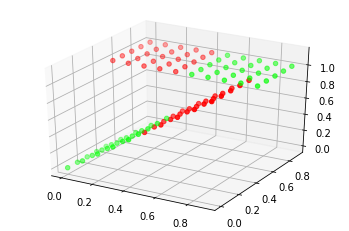

In [10]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [11]:
fis.premises = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

SyntaxError: invalid syntax (<ipython-input-11-3597d7f055b1>, line 1)

In [ ]:
fis.tsk = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4 ...). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, ważne żeby było widać jaka jest zależność.

In [12]:
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [13]:
%matplotlib inline

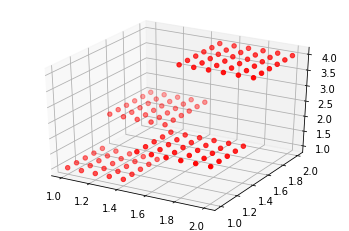

In [14]:
x = np.arange(1, 2.1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.multiply(np.round(dataX),np.round(dataY))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

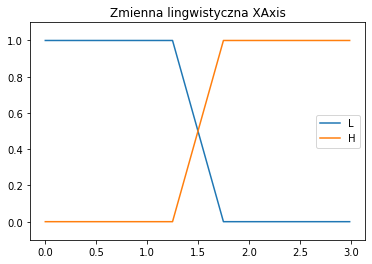

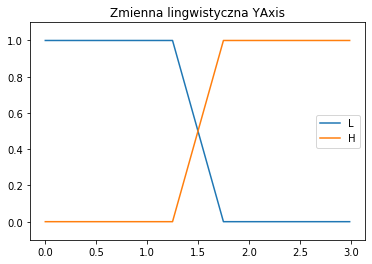

In [15]:
varX = FuzzyInputVariable_2Trapezoids(1.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(1.5, 0.5, "YAxis", ["L","H"])

#mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

Parametry początkowe:
Przesłanki:  [[1.5, 0.5], [1.5, 0.5]] 
Konkluzje:  [[0.27224375 0.4270565  0.04183382]
 [0.77799433 0.1381369  0.27367077]
 [0.50858489 0.30733011 0.31558833]
 [0.16474937 0.4543107  0.74735415]]


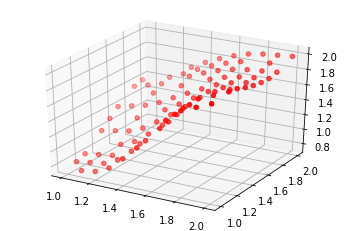

In [16]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

Optymalizacja zakończona!
z blędem:   3.4285735399271093
Liczba ew:  488569
Liczba it:  500
TIME elapsed:  106.80145359039307


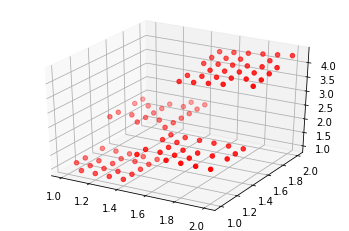

In [17]:
start = time.time()
fis.train(True, True, False, True, n_iter=500)
end = time.time()


czas.append(end-start)

print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

In [18]:
czas

[106.80145359039307]

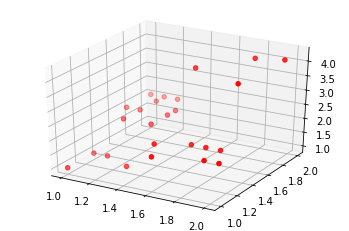

[[ 4  0  0]
 [ 0 17  0]
 [ 0  0  4]]


In [19]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

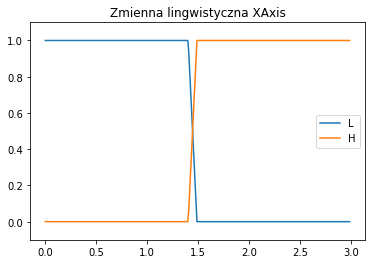

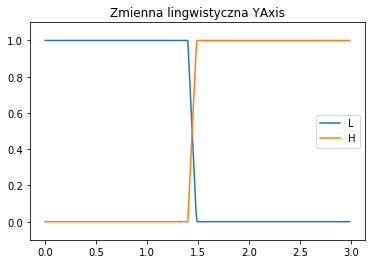

In [20]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

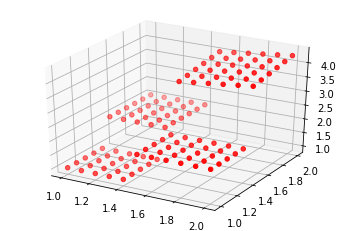

In [21]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [22]:
print("Parametry końcowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

Parametry końcowe:
Przesłanki:  [[1.44690176 0.0861069 ]
 [1.44293852 0.08524026]] 
Konkluzje:  [[3.03288527e-08 2.36434534e-16 9.99999935e-01]
 [4.00391164e-08 1.42668445e-15 1.99999988e+00]
 [3.03614416e-08 1.93602164e-16 1.99999998e+00]
 [5.71428477e-01 5.71428653e-01 2.00000000e+00]]


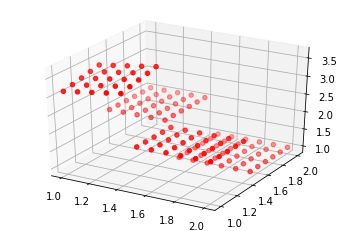

In [23]:
fis.premises = [[ 1.45462313, -0.05206001], [ 1.45118139, -0.09198265]]
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

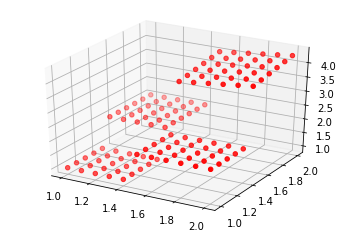

In [24]:
fis.tsk = [[5.71428299e-01, 5.71428652e-01, 2.00000000e+00],
 [7.81216873e-07, 7.88496429e-20, 1.99999896e+00],
 [1.41753706e-08, 1.06690462e-16, 2.00000000e+00],
 [3.27373199e-08, 2.29266611e-09, 9.99999999e-01]]
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

# ZADANIE 2 : 3x3

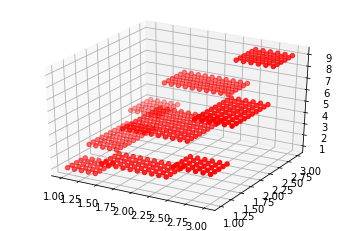

In [25]:
x = np.arange(1, 3.1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.multiply(np.round(dataX),np.round(dataY))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

Utworzenie funkcji przynależności

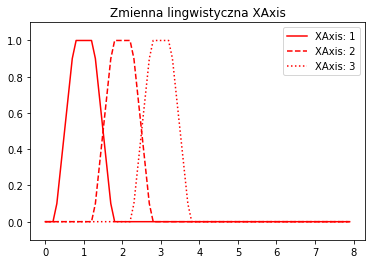

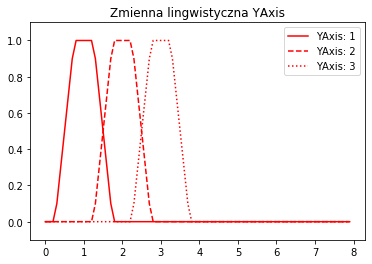

In [26]:
#varX = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 0.25, 0.25, "XAxis", ["L","H"]) # low, high
#varY = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 0.25, 0.25, "YAxis", ["L","H"])


mf1 = [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["1","2","3"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["1","2","3"])


x = np.arange(0,8,0.1)
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show(x)
plt.legend()

plt.figure()
varY.show(x)
plt.legend()

plt.show()

Parametry początkowe:
Przesłanki:  [[[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5]], [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[0.68239828 0.1103349  0.63550416]
 [0.27878706 0.55567483 0.95134181]
 [0.16479858 0.45921785 0.15851438]
 [0.99114341 0.04695588 0.73188934]
 [0.46014826 0.6022355  0.18514768]
 [0.2260882  0.11502573 0.31995276]
 [0.23423129 0.93806801 0.03715402]
 [0.88974616 0.86023242 0.99214243]
 [0.87383754 0.51683634 0.33154204]]


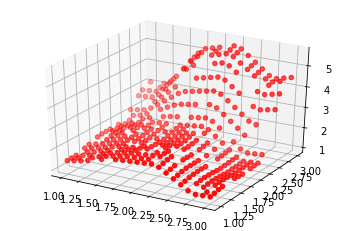

In [27]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

C:\Users\sticz\Desktop\Pytong\Systemy Inteligentne(I perenc)\Sl2 updated\ANFIS.py:89: RuntimeWarning: invalid value encountered in true_divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   11.561566279185513
Liczba ew:  410518
Liczba it:  100
TIME elapsed:  169.97851061820984


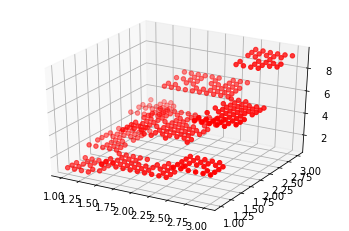

In [28]:
start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()


czas.append(end-start)

print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

In [29]:
czas

[106.80145359039307, 169.97851061820984]

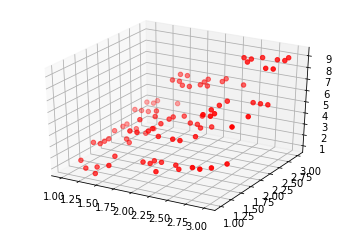

[[ 4  0  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 24  0]
 [ 0  0  0  0  0  9]]


In [30]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

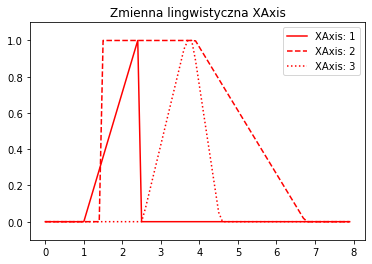

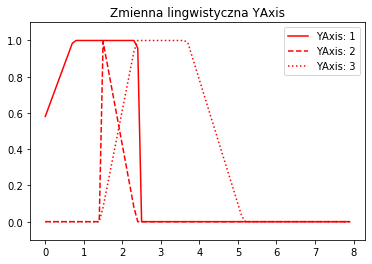

In [31]:
#Wyświetlanie funkcji przynależnosci

plt.figure()
varX.show(x)
plt.legend()

plt.figure()
varY.show(x)
plt.legend()

plt.show()

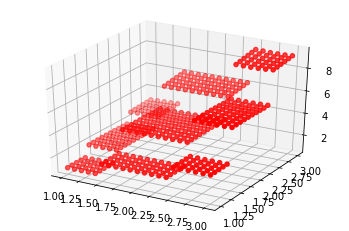

In [32]:
#Sprawdzanie wpływu parametrów na wyniki systemu
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [33]:
print("Parametry końcowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

Parametry końcowe:
Przesłanki:  [[[2.40808838 0.01701063 1.39958329 0.06314911]
  [2.69389903 2.40001399 0.08478129 2.86024627]
  [3.73748947 0.16635942 1.13918688 0.71635095]]

 [[1.56168987 1.66830915 1.73663861 0.09875595]
  [1.48385585 0.02123064 0.04031209 0.87501922]
  [3.01981    1.32474366 0.93198016 1.46068709]]] 
Konkluzje:  [[0.02011557 0.04683608 0.91638452]
 [0.67396375 0.13665644 1.18029286]
 [0.35909084 0.01785542 1.05624592]
 [0.13115386 0.51231708 1.98179473]
 [1.9779053  1.23164699 1.99722316]
 [1.47010956 0.31344189 1.58715893]
 [0.23895505 0.26064617 1.99447244]
 [1.98221872 0.74648818 1.99920636]
 [1.59318857 0.02519053 1.95693017]]


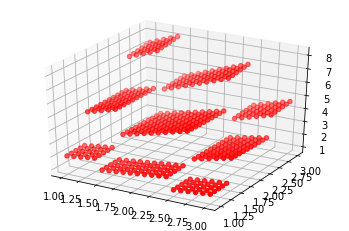

In [34]:
fis.premises = [[[2.67585908e+00, 2.45698383e+00, 4.43306039e-02, 1.12659307e+00],
  [2.40828203e+00, 2.23566106e-02, 1.85549771e+00, 8.05865525e-02],
  [3.99999728e+00, 3.95431777e-13, 1.59768662e+00, 2.23847444e+00]],
 [[2.41718034e+00, 4.21259347e-02, 2.07576583e+00, 6.18021207e-02],
  [3.29802458e+00, 3.65260704e+00, 1.03638192e-02, 1.16801097e+00],
  [4.00000000e+00, 0.00000000e+00, 1.59614629e+00, 1.52804641e-14]]]
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

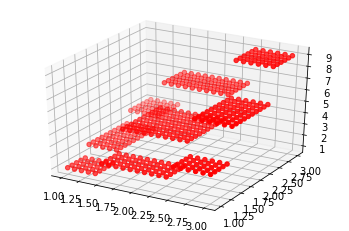

In [35]:
fis.tsk =  [[5.38919880e-01, 0.00000000e+00, 1.70815051e+00],
 [1.18570491e-15, 2.70606221e-14, 1.00000116e+00],
 [4.44892641e-02, 7.62675786e-04, 2.00000000e+00],
 [1.54395388e+00, 1.36778608e+00, 2.00000000e+00],
 [0.00000000e+00, 4.81737786e-01, 1.84570343e+00],
 [1.37378303e-01, 1.75347426e+00, 2.00000000e+00],
 [1.88652015e+00, 1.15395562e-01, 2.00000000e+00],
 [1.24847921e-02, 7.10425762e-02, 2.00000000e+00],
 [1.41092194e-02, 2.56148215e-01, 1.98967297e+00]]
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

# ZADANIE 3 : 4x4

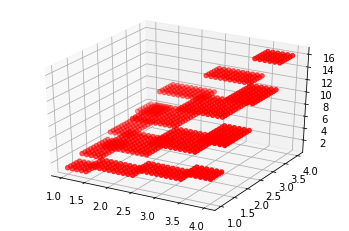

In [36]:
x = np.arange(1, 4.1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.multiply(np.round(dataX),np.round(dataY))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

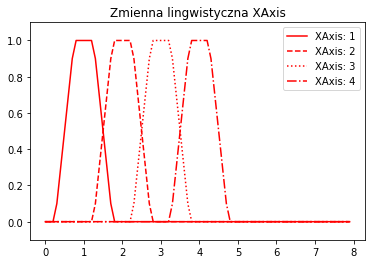

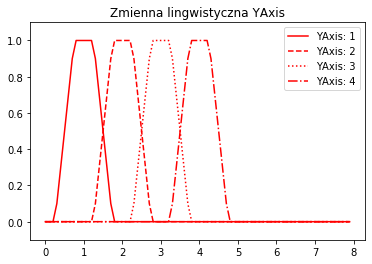

In [37]:
#varX = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 0.25, 0.25, "XAxis", ["L","H"]) # low, high
#varY = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 0.25, 0.25, "YAxis", ["L","H"])


mf1 = [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["1","2","3","4"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["1","2","3","4"])


#Wyświetlanie funkcji przynależnosci
x = np.arange(0,8,0.1)
plt.figure()
varX.show(x)
plt.legend()

plt.figure()
varY.show(x)
plt.legend()

plt.show()

Parametry początkowe:
Przesłanki:  [[[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5]], [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[0.7249913  0.56056363 0.70318846]
 [0.83457629 0.81573321 0.180979  ]
 [0.24751479 0.36509891 0.77180299]
 [0.91979423 0.47810205 0.30189324]
 [0.65292497 0.60677436 0.23903345]
 [0.41750517 0.38722519 0.78722295]
 [0.6695178  0.31725456 0.04931089]
 [0.63703488 0.61225499 0.53312427]
 [0.48976389 0.99008002 0.04516661]
 [0.63063832 0.92660986 0.17080931]
 [0.24612941 0.17611769 0.19698098]
 [0.73489615 0.53493522 0.42386489]
 [0.77837808 0.11767191 0.34828728]
 [0.64365222 0.62751753 0.12703899]
 [0.24051881 0.60187232 0.41476697]
 [0.06585986 0.80836949 0.67456581]]


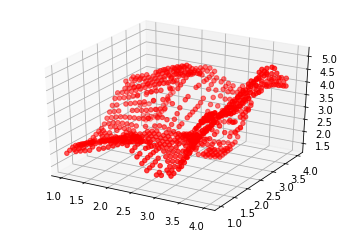

In [38]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

Optymalizacja zakończona!
z blędem:   106.50233361439288
Liczba ew:  674559
Liczba it:  100
TIME elapsed:  540.987902879715


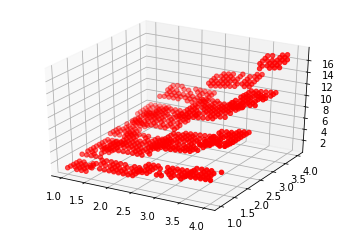

In [39]:
start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()

czas.append(end-start)

print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

In [40]:
czas

[106.80145359039307, 169.97851061820984, 540.987902879715]

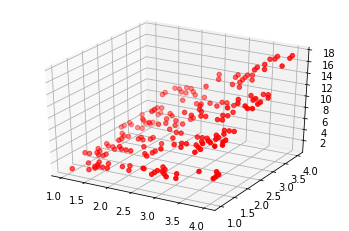

[[ 5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2 22  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  6  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [41]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

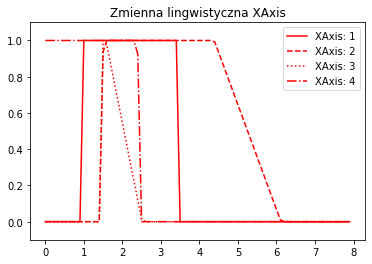

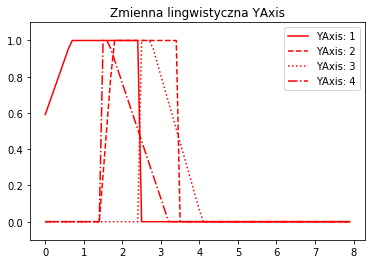

In [42]:
#Wyświetlanie funkcji przynależnosci

plt.figure()
varX.show(x)
plt.legend()

plt.figure()
varY.show(x)
plt.legend()

plt.show()

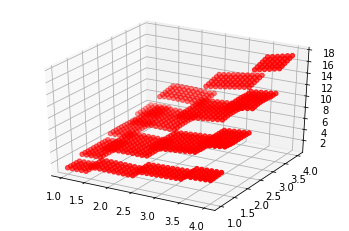

In [43]:
#Sprawdzanie wpływu parametrów na wyniki systemu
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [44]:
print("Parametry końcowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

Parametry końcowe:
Przesłanki:  [[[2.20584578 2.41360624 0.01187261 0.08453867]
  [2.94444372 2.88118849 0.06053207 1.73272143]
  [1.5144225  0.12079329 0.05312341 0.93748841]
  [1.15561169 2.47463134 2.53332771 0.09506593]]

 [[1.55001691 1.74850203 1.65441675 0.06413676]
  [2.59878561 1.65056668 0.36933285 0.06691494]
  [2.6121711  0.25433656 0.05483227 1.34843724]
  [1.54109819 0.17516159 0.04928733 1.57189933]]] 
Konkluzje:  [[2.71224872e-01 5.27118682e-10 1.66472984e+00]
 [3.92747927e-01 4.14730888e-01 1.99545213e+00]
 [3.62133255e-01 3.11277439e-01 1.86278127e+00]
 [2.48470320e-02 1.68215553e-10 1.67658783e-03]
 [2.79019523e-01 1.26815783e+00 7.17689883e-01]
 [4.18431481e-01 1.95841500e+00 1.99674100e+00]
 [1.37233893e+00 5.90593150e-01 1.81550934e+00]
 [1.04149327e-02 2.10612536e-04 4.71648498e-05]
 [7.78555049e-01 1.30058617e+00 1.99265918e+00]
 [1.83574294e+00 1.96533474e+00 2.00000000e+00]
 [1.95462312e+00 1.83052078e+00 1.99994706e+00]
 [6.70245344e-02 5.82699244e-04 3.94428

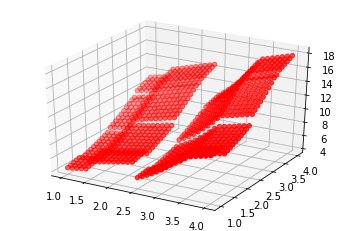

In [45]:
fis.premises = [[[7.21272962e-01, 1.53098452e+00, 7.05992748e-01, 5.67869511e-14],
  [1.96227108e+00, 2.94102751e+00, 3.76541045e+00, 6.56889283e-02],
  [3.56963470e+00, 2.13937252e+00, 7.73592984e-02, 1.70986553e+00],
  [2.47146286e+00, 5.69840584e-02, 2.14756264e-02, 8.51476302e-01]],[[1.44051812e+00, 3.06985988e-12, 4.09685962e-02, 1.85945879e+00],
  [2.23764152e+00, 3.48070522e-01, 2.05391445e+00, 8.76261881e-02],
  [2.02333737e+00, 2.79671988e+00, 2.49687068e+00, 7.44362395e-02],
  [2.70686735e+00, 2.52886211e+00, 4.27993389e-02, 2.78562698e+00]]] 
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

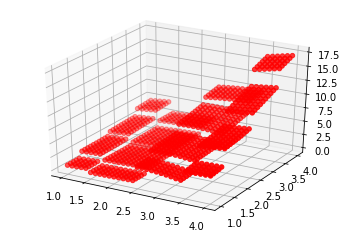

In [46]:
fis.tsk =  [[2.33433693e-01, 1.06066938e+00, 1.87662788e+00],
 [3.51943280e-01, 2.21376996e-01, 2.75639313e-02],
 [8.07979154e-01, 1.99999999e+00, 1.99999998e+00],
 [1.99970081e+00, 6.74521926e-01, 1.32566141e+00],
 [2.32546807e-01, 1.54051255e-01, 1.76801245e-01],
 [4.07698057e-02, 6.22007975e-03, 4.89620216e-02],
 [1.84806200e-02, 2.70415627e-01, 1.84215382e+00],
 [4.91549805e-01, 5.81152360e-01, 1.08479140e-01],
 [6.75537844e-01, 5.26651457e-01, 5.31276229e-01],
 [2.27803409e-01, 4.96952478e-03, 9.13184324e-02],
 [3.10720393e-01, 1.99998650e+00, 1.99999998e+00],
 [1.99997124e+00, 1.16730162e+00, 2.17203397e-01],
 [1.25752226e+00, 7.51140041e-01, 1.99999998e+00],
 [4.85952984e-01, 1.56154802e-04, 1.96188554e+00],
 [1.77481724e+00, 1.99999996e+00, 1.99999999e+00],
 [1.99997352e+00, 1.10539682e+00, 5.82910700e-01]]
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [47]:
czas

[106.80145359039307, 169.97851061820984, 540.987902879715]

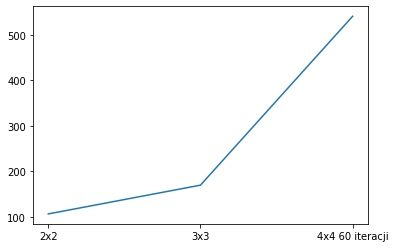

In [49]:
import matplotlib.pyplot as plt
import pylab
x=['2x2','3x3','4x4 60 iteracji']
pylab.plot(x,czas)
pylab.show()